In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Loading the Data

In [30]:
#Saving each season as a data frame
#Data frames from Football-Data
df1_fbd = pd.read_csv("liga0910.csv")
df2_fbd = pd.read_csv("liga1011.csv")
df3_fbd = pd.read_csv("liga1112.csv")
df4_fbd = pd.read_csv("liga1213.csv")
df5_fbd = pd.read_csv("liga1314.csv")
df6_fbd = pd.read_csv("liga1415.csv")
df7_fbd = pd.read_csv("liga1516.csv")
df8_fbd = pd.read_csv("liga1617.csv")
df9_fbd = pd.read_csv("liga1718.csv")
df10_fbd = pd.read_csv("liga1819.csv")
df11_fbd = pd.read_csv("liga1920.csv")
df12_fbd = pd.read_csv("liga2021.csv")

#Renaming teams so fbd and fbref match
team_mapping = {
    'Alavés': 'Alaves',
    'Almería':'Almeria',
    'Athletic Club':'Ath Bilbao',
    'Atlético Madrid': 'Ath Madrid',
    'Celta Vigo': 'Celta',
    'Córdoba':'Cordoba',
    'Espanyol':'Espanol',
    'La Coruña':'La Coruna',
    'Málaga':'Malaga',
    'Racing Sant':'Santander',
    'Sporting Gijón':'Sp Gijon',
    'Hércules':'Hercules',
    'Real Sociedad': 'Sociedad',
    'Rayo Vallecano':'Vallecano',
    'Celta Vigo':'Celta',
    'Leganés':'Leganes',
    'Cádiz': 'Cadiz',
}

#2009/10 Season
df1_fbd = df1_fbd.iloc[:, :22] #removing betting data
df1_fbref = pd.read_html('https://fbref.com/en/comps/12/2009-2010/2009-2010-La-Liga-Stats')[0]
df1_fbref = df1_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df1_fbref['Squad'] = df1_fbref['Squad'].replace(team_mapping) #renaming
df1 = df1_fbd.merge(df1_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
df1 = df1.drop('Squad', axis=1)


#2010/11 Season
df2_fbd = df2_fbd.iloc[:, :22] #removing betting data
df2_fbref = pd.read_html('https://fbref.com/en/comps/12/2010-2011/2010-2011-La-Liga-Stats')[0]
df2_fbref = df2_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df2_fbref['Squad'] = df2_fbref['Squad'].replace(team_mapping) #renaming
df2 = df2_fbd.merge(df2_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
df2 = df2.drop('Squad', axis=1)

#2011/12 Season
df3_fbd = df3_fbd.iloc[:, :22] #removing betting data
df3_fbref = pd.read_html('https://fbref.com/en/comps/12/2011-2012/2011-2012-La-Liga-Stats')[0]
df3_fbref = df3_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df3_fbref['Squad'] = df3_fbref['Squad'].replace(team_mapping) #renaming
df3 = df3_fbd.merge(df3_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
# Assuming you have a DataFrame named 'df'
df3 = df3.drop('Squad', axis=1)

#2012/13 Season
df4_fbd = df4_fbd.iloc[:, :22] #removing betting data
df4_fbref = pd.read_html('https://fbref.com/en/comps/12/2012-2013/2012-2013-La-Liga-Stats')[0]
df4_fbref = df4_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df4_fbref['Squad'] = df4_fbref['Squad'].replace(team_mapping) #renaming
df4 = df4_fbd.merge(df4_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
# Assuming you have a DataFrame named 'df'
df4 = df4.drop('Squad', axis=1)


#2013/14 Season
df5_fbd = df5_fbd.iloc[:, :22] #removing betting data
df5_fbref = pd.read_html('https://fbref.com/en/comps/12/2013-2014/2013-2014-La-Liga-Stats')[0]
df5_fbref = df5_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df5_fbref['Squad'] = df5_fbref['Squad'].replace(team_mapping) #renaming
df5 = df5_fbd.merge(df5_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
# Assuming you have a DataFrame named 'df'
df5 = df5.drop('Squad', axis=1)

#2014/15 Season
df6_fbd = df6_fbd.iloc[:, :22] #removing betting data
df6_fbref = pd.read_html('https://fbref.com/en/comps/12/2014-2015/schedule/2014-2015-La-Liga-Scores-and-Fixtures')[0]
df6_fbref = df6_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 6,7]]  #Selecting the home, away and attendance columns 
df6_fbref['Home'] = df6_fbref['Home'].replace(team_mapping) #Replacing home teams
df6_fbref['Away'] = df6_fbref['Away'].replace(team_mapping) #Replacing away teams
df6 = df6_fbd.merge(df6_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df6_fbd['Attendance'] = df6['Attendance']
df6 = df6.drop(['Home', 'Away'], axis =1) #Drop home and away 


#2015/16 Season
df7_fbd = df7_fbd.iloc[:, :22] #removing betting data
df7_fbref = pd.read_html('https://fbref.com/en/comps/12/2015-2016/schedule/2015-2016-La-Liga-Scores-and-Fixtures')[0]
df7_fbref = df7_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 6, 7]]  #Selecting the home, away and attendance columns 
df7_fbref['Home'] = df7_fbref['Home'].replace(team_mapping) #Replacing home names
df7_fbref['Away'] = df7_fbref['Away'].replace(team_mapping) #Replacing away teams
df7 = df7_fbd.merge(df7_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')  #Merging fbref and fbd
df7_fbd['Attendance'] = df7['Attendance'] 
df7 = df7.drop(['Home', 'Away'], axis =1) #Drop home and away 

#2016/17 Season
df8_fbd = df8_fbd.iloc[:, :22] #removing betting data
df8_fbref = pd.read_html('https://fbref.com/en/comps/12/2016-2017/schedule/2016-2017-La-Liga-Scores-and-Fixtures')[0]
df8_fbref = df8_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 6, 7]]   #Selecting the home, away and attendance columns 
df8_fbref['Home'] = df8_fbref['Home'].replace(team_mapping) #Replacing home teams
df8_fbref['Away'] = df8_fbref['Away'].replace(team_mapping) #Replacing away teams
df8 = df8_fbd.merge(df8_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df8_fbd['Attendance'] = df8['Attendance']
df8 = df8.drop(['Home', 'Away'], axis =1) #Drop home and away 


#2017/18 Season
df9_fbd = df9_fbd.iloc[:, :22] #removing betting data
df9_fbref = pd.read_html('https://fbref.com/en/comps/12/2017-2018/schedule/2017-2018-La-Liga-Scores-and-Fixtures')[0]
df9_fbref = df9_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 8, 9]]   #Selecting the home, away and attendance columns 
df9_fbref['Home'] = df9_fbref['Home'].replace(team_mapping) #Replacing home teams
df9_fbref['Away'] = df9_fbref['Away'].replace(team_mapping) #Replacing away teams
df9 = df9_fbd.merge(df9_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df9_fbd['Attendance'] = df9['Attendance']
df9 = df9.drop(['Home', 'Away'], axis =1) #Drop home and away 

#2018/19 Season
df10_fbd = df10_fbd.iloc[:, :22] #removing betting data
df10_fbref = pd.read_html('https://fbref.com/en/comps/12/2018-2019/schedule/2018-2019-La-Liga-Scores-and-Fixtures')[0]
df10_fbref = df10_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4,8, 9]]   #Selecting the home, away and attendance columns 
df10_fbref['Home'] = df10_fbref['Home'].replace(team_mapping) #Replacing home teams
df10_fbref['Away'] = df10_fbref['Away'].replace(team_mapping) #Replacing away teams
df10 = df10_fbd.merge(df10_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df10_fbd['Attendance'] = df10['Attendance']
df10 = df10.drop(['Home', 'Away'], axis =1) #Drop home and away 


#2019/20 Season
df11_fbd = df11_fbd.iloc[:, :23] #removing betting data
df11_fbref = pd.read_html('https://fbref.com/en/comps/12/2019-2020/schedule/2019-2020-La-Liga-Scores-and-Fixtures')[0]
df11_fbref = df11_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 8, 9]]   #Selecting the home, away and attendance columns 
df11_fbref['Home'] = df11_fbref['Home'].replace(team_mapping) #Replacing home teams
df11_fbref['Away'] = df11_fbref['Away'].replace(team_mapping) #Replacing away teams
df11 = df11_fbd.merge(df11_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df11_fbd['Attendance'] = df11['Attendance']
df11 = df11.drop(['Home', 'Away'], axis =1) #Drop home and away 
 
#2020/21 Season
df12_fbd = df12_fbd.iloc[:, :23] #removing betting data
df12_fbref = pd.read_html('https://fbref.com/en/comps/12/2020-2021/schedule/2020-2021-La-Liga-Scores-and-Fixtures')[0]
df12_fbref = df12_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 8, 9]]  #Selecting the home, away and attendance columns 
df12_fbref['Home'] = df12_fbref['Home'].replace(team_mapping) #Replacing home teams
df12_fbref['Away'] = df12_fbref['Away'].replace(team_mapping) #Replacing away teams
df12 = df12_fbd.merge(df12_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df12_fbd['Attendance'] = df12['Attendance']
df12 = df12.drop(['Home', 'Away'], axis =1) #Drop home and away 

#Adding all the Data frames together
la_liga = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], axis=0).reset_index(drop=True)

# Save the combined data frames to a new CSV file
la_liga.to_csv('la_liga.csv', index=False)

# Adding Season Column

In [31]:
# Create a Season column 
start_year = 2009
la_liga['Season'] = [f"{start_year + i // 380}/{start_year + i // 380 + 1}" for i in range(len(la_liga))]

# Move the season column to be the second column
la_liga.insert(1, 'Season', la_liga.pop('Season'))


# Data Cleaning

In [32]:
la_liga.head(10)

,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HF,AF,HC,AC,HY,AY,HR,AR,Attendance,Time
0,SP1,2009/2010,29/08/09,Real Madrid,La Coruna,3,2,H,2,1,...,18,12,10,3,2,2,0,0,74316.0,NaN
1,SP1,2009/2010,29/08/09,Zaragoza,Tenerife,1,0,H,0,0,...,16,17,7,8,1,4,0,0,24158.0,NaN
2,SP1,2009/2010,30/08/09,Almeria,Valladolid,0,0,D,0,0,...,9,11,12,2,2,2,0,1,11887.0,NaN
3,SP1,2009/2010,30/08/09,Ath Bilbao,Espanol,1,0,H,0,0,...,11,18,6,3,2,6,0,0,36079.0,NaN
4,SP1,2009/2010,30/08/09,Malaga,Ath Madrid,3,0,H,1,0,...,16,8,4,5,4,4,0,0,24479.0,NaN
5,SP1,2009/2010,30/08/09,Mallorca,Xerez,2,0,H,0,0,...,14,13,6,6,3,1,0,2,13209.0,NaN
6,SP1,2009/2010,30/08/09,Osasuna,Villarreal,1,1,D,1,1,...,18,14,4,14,2,2,0,0,16800.0,NaN
7,SP1,2009/2010,30/08/09,Santander,Getafe,1,4,A,1,3,...,14,10,4,5,2,3,0,0,16357.0,NaN
8,SP1,2009/2010,30/08/09,Valencia,Sevilla,2,0,H,0,0,...,20,14,7,0,1,2,0,1,41221.0,NaN
9,SP1,2009/2010,31/08/09,Barcelona,Sp Gijon,3,0,H,2,0,...,10,12,9,7,0,2,0,0,77106.0,NaN


In [33]:
#Shape
la_liga.shape

(4560, 25)

In [34]:
#Checking missing values
la_liga.isnull().sum()

Div              0
Season           0
Date             0
HomeTeam         0
AwayTeam         0
FTHG             0
FTAG             0
FTR              0
HTHG             0
HTAG             0
HTR              0
HS               0
AS               0
HST              0
AST              0
HF               0
AF               0
HC               0
AC               0
HY               0
AY               0
HR               0
AR               0
Attendance     488
Time          3800
dtype: int64

In [35]:
#Creating a data frame of mahces before covid
la_liga_pre_covid = la_liga.iloc[0:4069]
#Finding matches with missing attendance
la_liga_pre_covid[la_liga_pre_covid['Attendance'].isnull()]

,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HF,AF,HC,AC,HY,AY,HR,AR,Attendance,Time
3105,SP1,2017/2018,01/10/17,Barcelona,Las Palmas,3,0,H,0,0,...,10,11,8,3,5,1,0,0,NaN,NaN


In [36]:
#Identify rows with missing attendance values in the first 4089 rows
missing_attendance_rows = la_liga.loc[:4069][pd.isnull(la_liga.loc[:4069, 'Attendance'])]
print(missing_attendance_rows)
#Iterate over the missing rows and fill in the missing attendance values
for index, row in missing_attendance_rows.iterrows():
    # Extract relevant information from the current row
    home_team = row['HomeTeam']
    season = row['Season']

    # Calculate the average attendance for the home team in the current season
    average_attendance = la_liga[(la_liga['HomeTeam'] == home_team) & (la_liga['Season'] == season)]['Attendance'].mean()

    # Fill in the missing attendance value with the calculated average
    la_liga.at[index, 'Attendance'] = round(average_attendance, 0)

    
#replace all missing values with zero 
la_liga['Attendance'].fillna(0, inplace=True) 

      Div     Season        Date   HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  \
3105  SP1  2017/2018    01/10/17  Barcelona  Las Palmas     3     0   H     0   
4069  SP1  2019/2020  10/03/2020      Eibar    Sociedad     1     2   A     0   

      HTAG  ...  HF  AF  HC  AC  HY  AY  HR  AR  Attendance   Time  
3105     0  ...  10  11   8   3   5   1   0   0         NaN    NaN  
4069     1  ...  12  10   3   1   3   2   0   0         NaN  19:00  

[2 rows x 25 columns]


In [37]:
#Removing the time axis
la_liga = la_liga.drop('Time', axis=1)

In [38]:
#Rechecking missing values
la_liga.isnull().sum()

Div           0
Season        0
Date          0
HomeTeam      0
AwayTeam      0
FTHG          0
FTAG          0
FTR           0
HTHG          0
HTAG          0
HTR           0
HS            0
AS            0
HST           0
AST           0
HF            0
AF            0
HC            0
AC            0
HY            0
AY            0
HR            0
AR            0
Attendance    0
dtype: int64

In [39]:
#Checking if there are duplicated rows
la_liga.duplicated().sum()

0

In [40]:
#Checking data types
la_liga.dtypes

Div            object
Season         object
Date           object
HomeTeam       object
AwayTeam       object
FTHG            int64
FTAG            int64
FTR            object
HTHG            int64
HTAG            int64
HTR            object
HS              int64
AS              int64
HST             int64
AST             int64
HF              int64
AF              int64
HC              int64
AC              int64
HY              int64
AY              int64
HR              int64
AR              int64
Attendance    float64
dtype: object

In [41]:
#Describe the data
la_liga.describe().T

,count,mean,std,min,25%,50%,75%,max
FTHG,4560.0,1.571491,1.346903,0.0,1.00,1.0,2.0,10.0
FTAG,4560.0,1.132675,1.146318,0.0,0.00,1.0,2.0,8.0
HTHG,4560.0,0.694298,0.854886,0.0,0.00,0.0,1.0,6.0
HTAG,4560.0,0.496272,0.719474,0.0,0.00,0.0,1.0,5.0
HS,4560.0,13.625219,5.065539,1.0,10.00,13.0,17.0,37.0
AS,4560.0,10.777412,4.495936,0.0,8.00,10.0,14.0,39.0
HST,4560.0,4.901974,2.641942,0.0,3.00,5.0,6.0,18.0
AST,4560.0,3.813158,2.245944,0.0,2.00,3.5,5.0,16.0
HF,4560.0,14.189035,4.411521,1.0,11.00,14.0,17.0,33.0
AF,4560.0,14.050877,4.307041,0.0,11.00,14.0,17.0,31.0


In [42]:
#Row with highest attendace
max_row_index = la_liga['Attendance'].idxmax()

# Change the Attendance value for the maximum row to 23506
la_liga.at[max_row_index, 'Attendance'] = 23506


#Changing other match attendances that are incorrect in fbref
la_liga.at[3883, 'Attendance'] = 13018
la_liga.at[3373, 'Attendance'] = 54522

In [43]:
la_liga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Div         4560 non-null   object 
 1   Season      4560 non-null   object 
 2   Date        4560 non-null   object 
 3   HomeTeam    4560 non-null   object 
 4   AwayTeam    4560 non-null   object 
 5   FTHG        4560 non-null   int64  
 6   FTAG        4560 non-null   int64  
 7   FTR         4560 non-null   object 
 8   HTHG        4560 non-null   int64  
 9   HTAG        4560 non-null   int64  
 10  HTR         4560 non-null   object 
 11  HS          4560 non-null   int64  
 12  AS          4560 non-null   int64  
 13  HST         4560 non-null   int64  
 14  AST         4560 non-null   int64  
 15  HF          4560 non-null   int64  
 16  AF          4560 non-null   int64  
 17  HC          4560 non-null   int64  
 18  AC          4560 non-null   int64  
 19  HY          4560 non-null  

# Adding New Variables

In [44]:
# Home team average goals scored at home full time
la_liga['HAGSFT'] = (
    la_liga.groupby(['Season', 'HomeTeam'])['FTHG']  # Grouping by season and home team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)


#Away team average goals scored away full time 
la_liga['AAGSFT'] = (
    la_liga.groupby(['Season', 'AwayTeam'])['FTAG'] #Grouping by season and home team, selecting FTAG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average goals scored at home half time
la_liga['HAGSHT'] = (
    la_liga.groupby(['Season', 'HomeTeam'])['HTHG'] #Grouping by season and home team, selecting HTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average goals scored away half time 
la_liga['AAGSHT'] = (
    la_liga.groupby(['Season', 'AwayTeam'])['HTAG'] #Grouping by season and home team, selecting HTAG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



# Home team average goals conceded at home fill time
la_liga['HAGCFT'] = (
    la_liga.groupby(['Season', 'HomeTeam'])['FTAG']  # Grouping by season and home team, selecting FTAG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

# Away team average goals conceded away full time 
la_liga['AAGCFT'] = (
    la_liga.groupby(['Season', 'AwayTeam'])['FTHG']  # Grouping by season and away team, selecting FTAG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)


#Home team average red cards at home 
la_liga['HAR'] = (
    la_liga.groupby(['Season', 'HomeTeam'])['HR'] #Grouping by season and home team, selecting HR
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average red cards away 
la_liga['AAR'] = (
    la_liga.groupby(['Season', 'AwayTeam'])['AR'] #Grouping by season and home team, selecting AR
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average yellow cards at home 
la_liga['HAY'] = (
    la_liga.groupby(['Season', 'HomeTeam'])['HY'] #Grouping by season and home team, selecting HY
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average yellow cards away 
la_liga['AAY'] = (
    la_liga.groupby(['Season', 'AwayTeam'])['AY'] #Grouping by season and home team, selecting AY
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)


#Home team average fouls at home 
la_liga['HAF'] = (
    la_liga.groupby(['Season', 'HomeTeam'])['HF'] #Grouping by season and home team, selecting HF
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average fouls away 
la_liga['AAF'] = (
    la_liga.groupby(['Season', 'AwayTeam'])['AF'] #Grouping by season and home team, selecting AF
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average corners at home 
la_liga['HAC'] = (
    la_liga.groupby(['Season', 'HomeTeam'])['HC'] #Grouping by season and home team, selecting HC
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average corners away 
la_liga['AAC'] = (
    la_liga.groupby(['Season', 'AwayTeam'])['AC'] #Grouping by season and home team, selecting AC
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average shots at home 
la_liga['HAS'] = (
    la_liga.groupby(['Season', 'HomeTeam'])['HS'] #Grouping by season and home team, selecting HS
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average shots away 
la_liga['AAS'] = (
    la_liga.groupby(['Season', 'AwayTeam'])['AS'] #Grouping by season and home team, selecting AS
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average shots on target at home 
la_liga['HAST'] = (
    la_liga.groupby(['Season', 'HomeTeam'])['HST'] #Grouping by season and home team, selecting HST
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average shots on target away 
la_liga['AAST'] = (
    la_liga.groupby(['Season', 'AwayTeam'])['AST'] #Grouping by season and home team, selecting AST
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)







#Home team percentage of games won, lost and drawn at home
# Create new columns to store cumulative statistics for each HomeTeam's away games
la_liga['home_games'] = 0
la_liga['home_won'] = 0
la_liga['home_lost'] = 0
la_liga['home_drawn'] = 0

# Create dictionary to keep track of cumulative statistics for each HomeTeam within each season
cumulative_stats_by_season = {}

# Iterate through each row 
for index, row in la_liga.iterrows():
    home_team = row['HomeTeam']
    season = row['Season']

    # If the AwayTeam is not in the dictionary for the current season, all stats are zero
    if (home_team, season) not in cumulative_stats_by_season:
        cumulative_stats_by_season[(home_team, season)] = {'home_games': 0, 'home_won': 0, 'home_lost': 0, 'home_drawn': 0}

    # Update cumulative statistics based on the FTR result
    cumulative_stats_by_season[(home_team, season)]['home_games'] += 1
    cumulative_stats_by_season[(home_team, season)]['home_won'] += (row['FTR'] == 'H')
    cumulative_stats_by_season[(home_team, season)]['home_lost'] += (row['FTR'] == 'A')
    cumulative_stats_by_season[(home_team, season)]['home_drawn'] += (row['FTR'] == 'D')

    # Assign cumulative statistics to the corresponding columns in the data frame
    la_liga.at[index, 'home_games'] = cumulative_stats_by_season[(home_team, season)]['home_games']
    la_liga.at[index, 'home_won'] = cumulative_stats_by_season[(home_team, season)]['home_won']
    la_liga.at[index, 'home_lost'] = cumulative_stats_by_season[(home_team, season)]['home_lost']
    la_liga.at[index, 'home_drawn'] = cumulative_stats_by_season[(home_team, season)]['home_drawn']

    # If it's the first match of a new season, reset the cumulative stats for that AwayTeam
    if index > 0 and season != la_liga.at[index - 1, 'Season']:
        cumulative_stats_by_season[(home_team, season)] = {'home_games': 0, 'home_won': 0, 'home_lost': 0, 'home_drawn': 0}

#For each team shift the statsitcs down a row 
la_liga['home_won'] = la_liga.groupby('HomeTeam')['home_won'].transform(lambda x: x.shift(1))
la_liga['home_drawn'] = la_liga.groupby('HomeTeam')['home_drawn'].transform(lambda x: x.shift(1))
la_liga['home_lost'] = la_liga.groupby('HomeTeam')['home_lost'].transform(lambda x: x.shift(1))
la_liga['home_games'] = la_liga.groupby('HomeTeam')['home_games'].transform(lambda x: x.shift(1))
# Replace NaN values in the columns with 0
la_liga['home_won'].fillna(0, inplace=True)
la_liga['home_drawn'].fillna(0, inplace=True)
la_liga['home_lost'].fillna(0, inplace=True)
la_liga['home_games'].fillna(0, inplace=True)


#calculate the means for each row
la_liga['HAWH'] = la_liga['home_won'] / la_liga['home_games']
la_liga['HALH'] = la_liga['home_lost'] / la_liga['home_games']
la_liga['HADH'] = la_liga['home_drawn'] / la_liga['home_games']


# Identify the first row of each AwayTeam in a new season
first_row_mask = la_liga.groupby(['Season', 'HomeTeam']).cumcount() == 0
# Set the values to zero
la_liga.loc[first_row_mask, ['HAWH', 'HALH', 'HADH']] = 0

#Remove the rows from the data frame 
la_liga =la_liga.drop(columns=['home_won','home_lost','home_drawn','home_games'],axis=1)







#Away team decimal of games won lost and drawn at home per season
# Create new columns to store cumulative statistics for each AwayTeam's away games
la_liga['away_games'] = 0
la_liga['away_won'] = 0
la_liga['away_lost'] = 0
la_liga['away_drawn'] = 0

# Create dictionary to keep track of cumulative statistics for each AwayTeam within each season
cumulative_stats_by_season = {}

# Iterate through each row 
for index, row in la_liga.iterrows():
    away_team = row['AwayTeam']
    season = row['Season']

    # If the AwayTeam is not in the dictionary for the current season, all stats are zero
    if (away_team, season) not in cumulative_stats_by_season:
        cumulative_stats_by_season[(away_team, season)] = {'away_games': 0, 'away_won': 0, 'away_lost': 0, 'away_drawn': 0}

    # Update cumulative statistics based on the FTR result
    cumulative_stats_by_season[(away_team, season)]['away_games'] += 1
    cumulative_stats_by_season[(away_team, season)]['away_won'] += (row['FTR'] == 'A')
    cumulative_stats_by_season[(away_team, season)]['away_lost'] += (row['FTR'] == 'H')
    cumulative_stats_by_season[(away_team, season)]['away_drawn'] += (row['FTR'] == 'D')

    # Assign cumulative statistics to the corresponding columns in the data frame
    la_liga.at[index, 'away_games'] = cumulative_stats_by_season[(away_team, season)]['away_games']
    la_liga.at[index, 'away_won'] = cumulative_stats_by_season[(away_team, season)]['away_won']
    la_liga.at[index, 'away_lost'] = cumulative_stats_by_season[(away_team, season)]['away_lost']
    la_liga.at[index, 'away_drawn'] = cumulative_stats_by_season[(away_team, season)]['away_drawn']

    # If it's the first match of a new season, reset the cumulative stats for that AwayTeam
    if index > 0 and season != la_liga.at[index - 1, 'Season']:
        cumulative_stats_by_season[(away_team, season)] = {'away_games': 0, 'away_won': 0, 'away_lost': 0, 'away_drawn': 0}

#For each team shift the statsitcs down a row 
la_liga['away_won'] = la_liga.groupby('AwayTeam')['away_won'].transform(lambda x: x.shift(1))
la_liga['away_drawn'] = la_liga.groupby('AwayTeam')['away_drawn'].transform(lambda x: x.shift(1))
la_liga['away_lost'] = la_liga.groupby('AwayTeam')['away_lost'].transform(lambda x: x.shift(1))
la_liga['away_games'] = la_liga.groupby('AwayTeam')['away_games'].transform(lambda x: x.shift(1))
# Replace NaN values in the columns with 0
la_liga['away_won'].fillna(0, inplace=True)
la_liga['away_drawn'].fillna(0, inplace=True)
la_liga['away_lost'].fillna(0, inplace=True)
la_liga['away_games'].fillna(0, inplace=True)

#calculate the means for each row
la_liga['AAWA'] = la_liga['away_won'] / la_liga['away_games']
la_liga['AALA'] = la_liga['away_lost'] / la_liga['away_games']
la_liga['AADA'] = la_liga['away_drawn'] / la_liga['away_games']


# Identify the first row of each AwayTeam in a new season
first_row_mask = la_liga.groupby(['Season', 'AwayTeam']).cumcount() == 0
# Set the values to zero
la_liga.loc[first_row_mask, ['AAWA', 'AALA', 'AADA']] = 0

#Remove the rows from the data frame 
la_liga =la_liga.drop(columns=['away_won','away_lost','away_drawn','away_games'],axis=1)

In [45]:
#Adding a new column for if the match was pre or during covid
# Set 'pre_covid' to True for rows up to index 4069, and False for rows after that index
la_liga['Pre_covid'] = la_liga.index <= 4069

#Creating pre and during covid data frame
la_liga_pre_covid = la_liga[la_liga['Pre_covid'] == True]
la_liga_during_covid = la_liga[la_liga['Pre_covid'] == False]

In [66]:
# Create initial columns for HomeTeamPoints and AwayTeamPoints
la_liga['HomeTeamPoints'] = 0
la_liga['AwayTeamPoints'] = 0

# Function to update points based on match result
def update_points(row):
    if row['FTR'] == 'H':
        row['HomeTeamPoints'] += 3
    elif row['FTR'] == 'D':
        row['HomeTeamPoints'] += 1
        row['AwayTeamPoints'] += 1
    elif row['FTR'] == 'A':
        row['AwayTeamPoints'] += 3
    return row

# Apply the update_points function to each row
la_liga = la_liga.apply(update_points, axis=1)

# Create running tally of points for each team for each season
la_liga['HomeTeamPoints'] = la_liga.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].cumsum()
la_liga['AwayTeamPoints'] = la_liga.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].cumsum()




# Create a data frame to store total points for each team within each season
total_points_home = la_liga.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].max().reset_index()
total_points_away = la_liga.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].max().reset_index()

# Merge the data frame to combine home and away points
total_points = pd.merge(total_points_home, total_points_away, how='outer', left_on=['Season', 'HomeTeam'], right_on=['Season', 'AwayTeam'], suffixes=('_Home', '_Away'))

# Calculate total points for each team by combining home and away points
total_points['TotalPoints'] = total_points['HomeTeamPoints'] + total_points['AwayTeamPoints']

# Calculate HA as the ratio of home points to the sum of home points and away points to 4 decimal places
total_points['SeasonalHA'] = round(total_points['HomeTeamPoints'] / (total_points['HomeTeamPoints'] + total_points['AwayTeamPoints']), 4)

# Calculate OverallHA for each team by summing overall home points and away points, then applying the formula H / (H + A) to 4 decimal places
overall_ha = total_points.groupby('HomeTeam', as_index=False).agg({'HomeTeamPoints': 'sum', 'AwayTeamPoints': 'sum'})
overall_ha['OverallHA'] = round(overall_ha['HomeTeamPoints'] / (overall_ha['HomeTeamPoints'] + overall_ha['AwayTeamPoints']), 4)


# Merge SeasonalHA and OverallHA into the total_points data frame
total_points = pd.merge(total_points, overall_ha[['HomeTeam', 'OverallHA']], how='left', left_on='HomeTeam', right_on='HomeTeam')

# Sort the data frame by 'Season' and 'TotalPoints' columns
total_points = total_points.sort_values(by=['Season', 'TotalPoints'], ascending=[True, False])

total_points = total_points[['Season', 'HomeTeam', 'HomeTeamPoints', 'AwayTeamPoints', 'TotalPoints', 'SeasonalHA', 'OverallHA']]

total_points.columns = ['Season', 'Team', 'Home Points', 'Away Points', 'Total Points', 'SeasonalHA', 'OverallHA']

total_points

,Season,Team,Home Points,Away Points,Total Points,SeasonalHA,OverallHA
3,2009/2010,Barcelona,55,44,99,0.5556,0.5464
10,2009/2010,Real Madrid,54,42,96,0.5625,0.5438
15,2009/2010,Valencia,44,27,71,0.6197,0.6106
12,2009/2010,Sevilla,36,27,63,0.5714,0.6257
8,2009/2010,Mallorca,46,16,62,0.7419,0.7137
...,...,...,...,...,...,...,...
229,2020/2021,Getafe,24,14,38,0.6316,0.6209
228,2020/2021,Elche,23,13,36,0.6389,0.5983
231,2020/2021,Huesca,22,12,34,0.6471,0.6418
238,2020/2021,Valladolid,16,15,31,0.5161,0.5895


In [67]:
# Create initial columns for HomeTeamPoints and AwayTeamPoints for pre covid
la_liga_pre_covid['HomeTeamPoints'] = 0
la_liga_pre_covid['AwayTeamPoints'] = 0

# Function to update points based on match result
def update_points(row):
    if row['FTR'] == 'H':
        row['HomeTeamPoints'] += 3
    elif row['FTR'] == 'D':
        row['HomeTeamPoints'] += 1
        row['AwayTeamPoints'] += 1
    elif row['FTR'] == 'A':
        row['AwayTeamPoints'] += 3
    return row

# Apply the update_points function to each row
la_liga_pre_covid = la_liga_pre_covid.apply(update_points, axis=1)

# Create running tally of points for each team for each season
la_liga_pre_covid['HomeTeamPoints'] = la_liga_pre_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].cumsum()
la_liga_pre_covid['AwayTeamPoints'] = la_liga_pre_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].cumsum()



# Create initial columns for HomeTeamPoints and AwayTeamPoints for pre covid
la_liga_during_covid['HomeTeamPoints'] = 0
la_liga_during_covid['AwayTeamPoints'] = 0


# Apply the update_points function to each row
la_liga_during_covid = la_liga_during_covid.apply(update_points, axis=1)

# Create running tally of points for each team for each season
la_liga_during_covid['HomeTeamPoints'] = la_liga_during_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].cumsum()
la_liga_during_covid['AwayTeamPoints'] = la_liga_during_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].cumsum()





# Calculate total points for each team within each season

# Create a DataFrame to store total points for each team within each season
total_points_home_pre = la_liga_pre_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].max().reset_index()
total_points_away_pre = la_liga_pre_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].max().reset_index()
total_points_home_during = la_liga_during_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].max().reset_index()
total_points_away_during = la_liga_during_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].max().reset_index()


#Aggregate the total points foe each team across the seasons 
total_points_home_pre = total_points_home_pre.groupby('HomeTeam')['HomeTeamPoints'].sum().reset_index()
total_points_away_pre = total_points_away_pre.groupby('AwayTeam')['AwayTeamPoints'].sum().reset_index()
total_points_home_during = total_points_home_during.groupby('HomeTeam')['HomeTeamPoints'].sum().reset_index()
total_points_away_during = total_points_away_during.groupby('AwayTeam')['AwayTeamPoints'].sum().reset_index()


#Rename columns for clarity 
total_points_home_pre= total_points_home_pre.rename(columns={'HomeTeamPoints':'HomePointsPreCovid', 'HomeTeam':'Team'})
total_points_away_pre= total_points_away_pre.rename(columns={'AwayTeamPoints':'AwayPointsPreCovid','AwayTeam':'Team'})
total_points_home_during= total_points_home_during.rename(columns={'HomeTeamPoints':'HomePointsDuringCovid', 'HomeTeam':'Team'})
total_points_away_during= total_points_away_during.rename(columns={'AwayTeamPoints':'AwayPointsDuringCovid','AwayTeam':'Team'})


#merge the total points for home and away team and for pre covid and covid
points = pd.merge(total_points_home_pre, total_points_away_pre, on='Team', how='outer')
points = pd.merge(points, total_points_home_during, on='Team', how='outer')
points = pd.merge(points, total_points_away_during, on='Team', how='outer')



#Combine home and away points to get the total points for each team
points['TotalPointsPreCovid'] = points['HomePointsPreCovid'] + points['AwayPointsPreCovid']
points['TotalPointsDuringCovid'] = points['HomePointsDuringCovid'] + points['AwayPointsDuringCovid']

# Calculate HA as the ratio of home points to the sum of home points and away points to 4 decimal places
points['HAPreCovid'] = round(points['HomePointsPreCovid'] / (points['TotalPointsPreCovid']), 4)
points['HADuringCovid'] = round(points['HomePointsDuringCovid'] / (points['TotalPointsDuringCovid']), 4)

#create a new data frame with only relevant columns and fill all NaN with 0
ha_pre_during_covid = points.drop(columns=['HomePointsPreCovid','HomePointsDuringCovid','AwayPointsPreCovid','AwayPointsDuringCovid','TotalPointsPreCovid','TotalPointsDuringCovid'],axis=1)
ha_pre_during_covid = ha_pre_during_covid.fillna(0)

ha_pre_during_covid

,Team,HAPreCovid,HADuringCovid
0,Alaves,0.5924,0.6222
1,Almeria,0.6181,0.0000
2,Ath Bilbao,0.6282,0.6167
3,Ath Madrid,0.5914,0.5495
4,Barcelona,0.5548,0.4660
5,Betis,0.6028,0.6087
6,Celta,0.6173,0.5625
7,Cordoba,0.4500,0.0000
8,Eibar,0.6226,0.4667
9,Elche,0.5802,0.6389


In [48]:
#Joining all tables 

#Merge the data frames based on Season and HomeTeam
merged_df = pd.merge(la_liga, total_points, how='left', left_on=['Season', 'HomeTeam'], right_on=['Season', 'HomeTeam'])

#Selecting and adding the columns 
columns_to_add = ['OverallHA', 'SeasonalHA']
la_liga[columns_to_add] = merged_df[columns_to_add]


# Merge the result data frame based on team and HomeTeam
merged_df = pd.merge(la_liga, ha_pre_during_covid, how='left', left_on='HomeTeam', right_on='Team')

#selecting and adding the columns add to the main data frame
columns_to_add = ['HAPreCovid', 'HADuringCovid']
la_liga[columns_to_add] = merged_df[columns_to_add]

#Renaming the columns 
la_liga = la_liga.rename(columns={'Pre_covid':'PreCovid'})

In [49]:
#Save the data frame with new columns to csv
la_liga.to_csv('la_liga.csv', index=False)

# Graphs

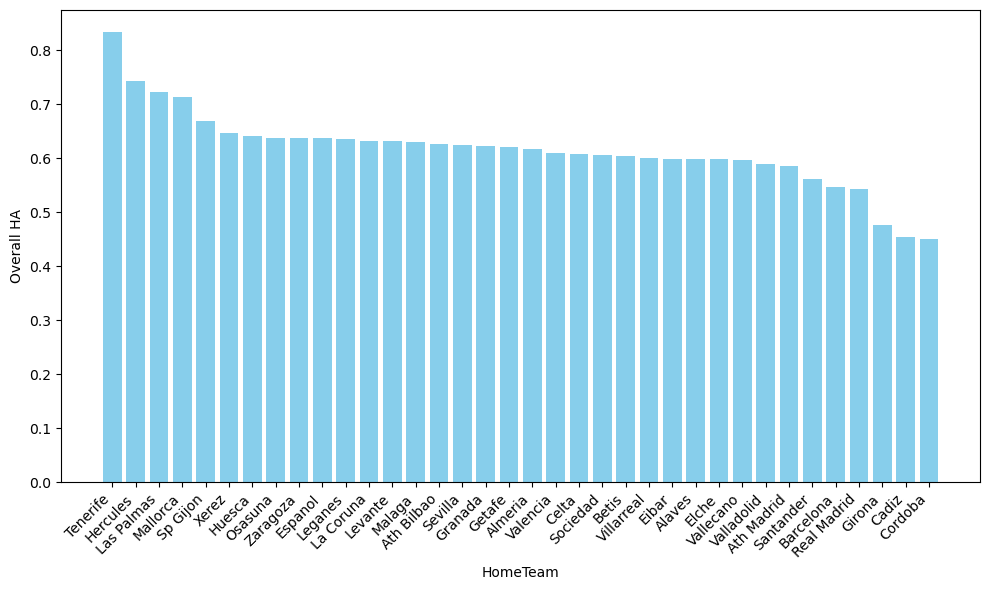

In [50]:
# Sort the DataFrame by OverallHA in descending order
total_points = total_points.sort_values(by='OverallHA', ascending=False)

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(total_points['HomeTeam'], total_points['OverallHA'], color='skyblue')
plt.xlabel('HomeTeam')
plt.ylabel('Overall HA')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

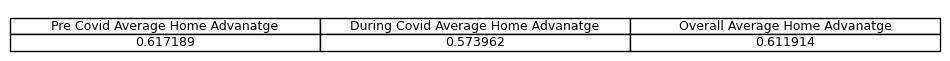

In [51]:
#Pre and during covid average home advantages 
#Calculate the HA for pre covid, during covid and overall, to 6 d.p.
ha_average_pre = round(la_liga.loc[:4069,'HAPreCovid'].mean(),6)
ha_average_during = round(la_liga.loc[4069:,'HADuringCovid'].mean(),6)
ha_average = round(la_liga.loc[:, 'OverallHA'].mean(),6)

#Create a dictoriary to keep the avergaes in 
ha_means = {
            'Pre Covid Average Home Advanatge':[ha_average_pre],
           'During Covid Average Home Advanatge': [ha_average_during],
           'Overall Average Home Advanatge': [ha_average]}
#Create a data frame from the dictionary
ha_means = pd.DataFrame(ha_means)

#Create a figure and axis for displaying the data
fig = plt.figure(figsize = (12,.1))
ax = fig.add_subplot(111)

#Display the table 
ax.table(cellText = ha_means.values, 
         colLabels = ha_means.columns, cellLoc='center')


#turn axes off
ax.axis('off')
#Show the plot
plt.show()

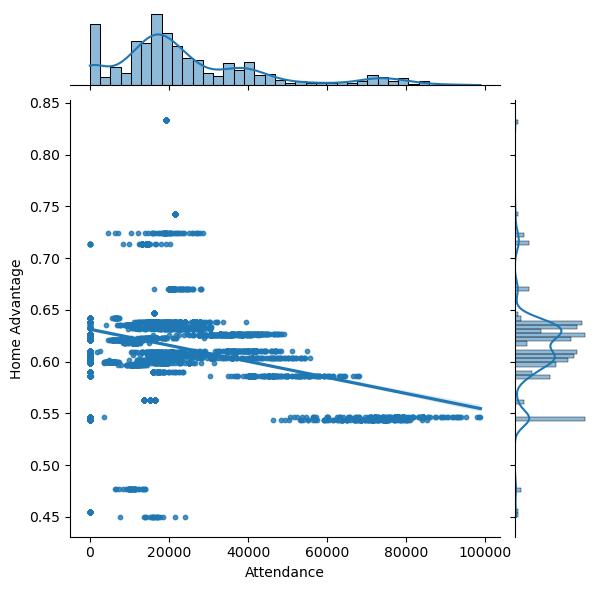

In [60]:
#A join plot using seaborn of attendacne and overallHA
joint_plot = sns.jointplot(x="Attendance", y="OverallHA", data=la_liga, kind='reg', fit_reg=True,scatter_kws={'s': 10})

# Set individual axis labels
joint_plot.set_axis_labels('Attendance', 'Home Advantage')


# Show the plot
plt.show()

# Cluster Analysis

## Attendance and Pre Covid Home Advanatge

In [68]:
#Creating two new data frames from the columns 'PreCovid'
la_liga_pre_covid = la_liga[la_liga['PreCovid'] == True]
la_liga_during_covid = la_liga[la_liga['PreCovid'] == False]


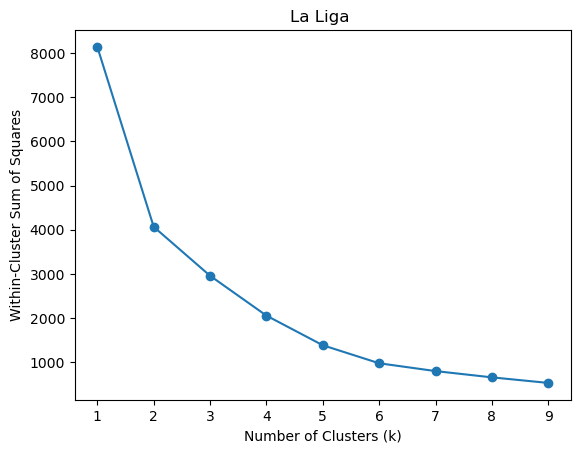

In [53]:
#Extracting the features
select_features = la_liga_pre_covid[['Attendance','HAPreCovid']]

#Scaling the features
scaler = StandardScaler()
select_features_standardised = scaler.fit_transform(select_features)

#Elbow method 
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(select_features_standardised)
    inertia.append(kmeans.inertia_)

#Plot the Elbow Method
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('La Liga ')
plt.show()



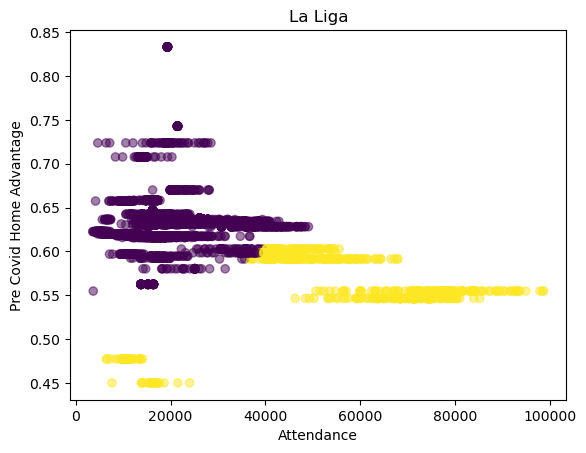

,HAPreCovid,Attendance
Cluster,,
0,0.630843,20352.0
1,0.565771,56659.0


In [59]:
#choosing K
optimal_k = 2

# Apply K-means clustering with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
la_liga_pre_covid.loc[:, 'Cluster'] = kmeans.fit_predict(select_features_standardised)




#Plot the clusters
plt.scatter(la_liga_pre_covid['Attendance'], la_liga_pre_covid['HAPreCovid'], c=la_liga_pre_covid['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Attendance')
plt.ylabel('Pre Covid Home Advantage')
plt.title('La Liga')
plt.show()


#cluster summary
cluster_summary = la_liga_pre_covid.groupby('Cluster')[['HAPreCovid', 'Attendance']].mean()
cluster_sizes = la_liga_pre_covid['Cluster'].value_counts().sort_index()
# Round Attendanc' values to 0 decimal places

cluster_summary['Attendance'] = cluster_summary['Attendance'].round(0)
cluster_summary


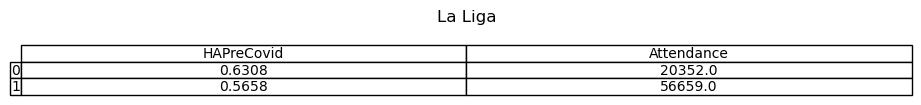

In [60]:
#Displaying the clusters
#Create a figure to show the table
fig = plt.figure(figsize = (11.5, .2))
ax = fig.add_subplot(111)

#Round the summaries to 4 d.p.
cluster_summary = round(cluster_summary,4)

#Display the summary in a table
ax.table(cellText = cluster_summary.values, rowLabels = cluster_summary.index, 
         colLabels = cluster_summary.columns, cellLoc='center')

#Title
ax.set_title('La Liga')
#Turn the axes off
ax.axis('off')
#Show table
plt.show()

## Match Statistic and Home Advantage

### Pre Covid

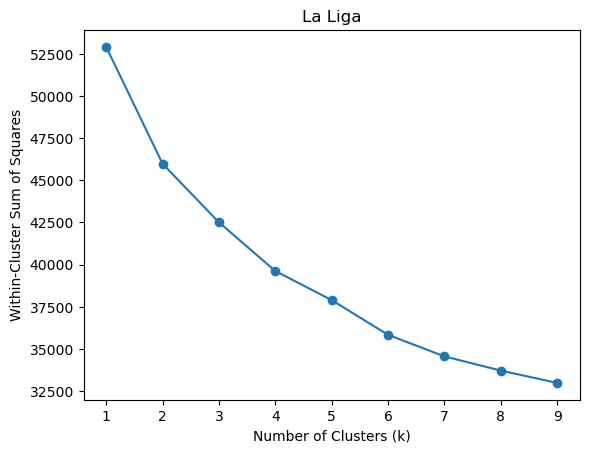

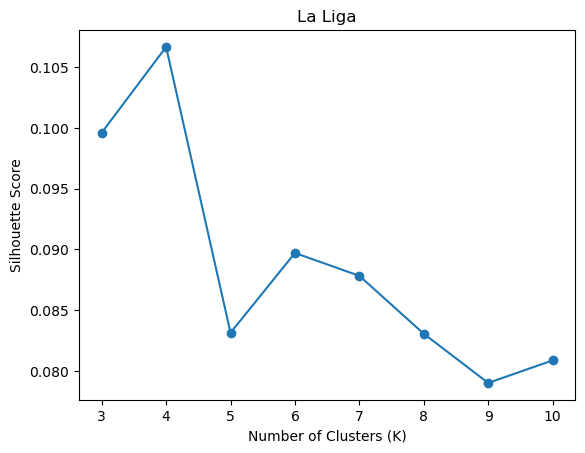

In [61]:
# Select features for clustering
select_features = la_liga_pre_covid[['HS', 'AS', 'HST', 'AST', 'HC','AC','HF', 'AF', 'HY','AY','HR','AR', 'HAPreCovid']]

# Standardize the features
scaler = StandardScaler()
select_features_standardised = scaler.fit_transform(select_features)


#Elbow method 
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(select_features_standardised)
    inertia.append(kmeans.inertia_)

#Plot the Elbow Method
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('La Liga')
plt.show()



# Evaluate silhouette scores for different values of K
silhouette_scores = []
for k in range(3, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(select_features_standardised)
    silhouette_avg = silhouette_score(select_features_standardised, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Method
plt.plot(range(3, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('La Liga')
plt.show()

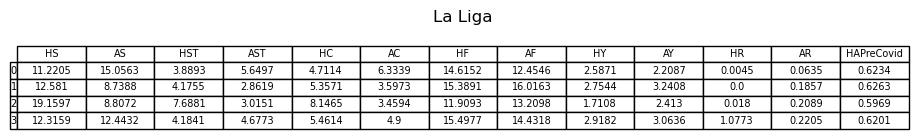

In [62]:
#optimal value of k
optimal_k = 4
#aaply k-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
la_liga_pre_covid['Cluster'] = kmeans.fit_predict(select_features_standardised)



#cluster summary 
cluster_summary = la_liga_pre_covid.groupby('Cluster')[[ 'HS', 'AS', 'HST', 'AST', 'HC','AC','HF', 'AF', 'HY','AY','HR','AR','HAPreCovid']].mean()


#Create a figure displaying the table
fig = plt.figure(figsize = (11.5, .2))
ax = fig.add_subplot(111)

#Round the summaries to 4d.p.
cluster_summary = round(cluster_summary,4)

#Display the summary in a table
ax.table(cellText = cluster_summary.values, rowLabels = cluster_summary.index, 
         colLabels = cluster_summary.columns, cellLoc='center')

#Title
ax.set_title('La Liga')

#turn axes off
ax.axis('off')
#Show table
plt.show()

### During Covid

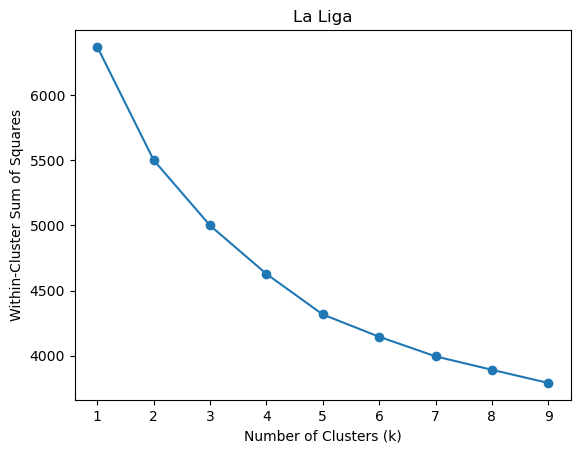

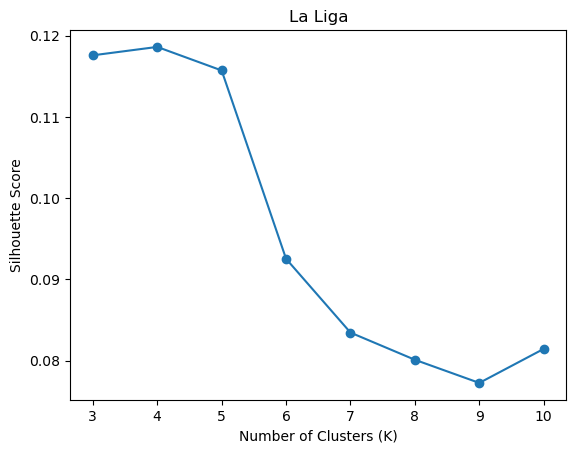

In [63]:
# Select features for clustering
select_features = la_liga_during_covid[['HS', 'AS', 'HST', 'AST', 'HC','AC','HF', 'AF', 'HY','AY','HR','AR','HADuringCovid']]

# Standardize the features
scaler = StandardScaler()
select_features_standardised = scaler.fit_transform(select_features)


#Elbow method 
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(select_features_standardised)
    inertia.append(kmeans.inertia_)

#Plot the Elbow Method
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('La Liga')
plt.show()



# Evaluate silhouette scores for different values of K
silhouette_scores = []
for k in range(3, 11):  # You can adjust the range as needed
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(select_features_standardised)
    silhouette_avg = silhouette_score(select_features_standardised, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Method
plt.plot(range(3, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('La Liga')
plt.show()

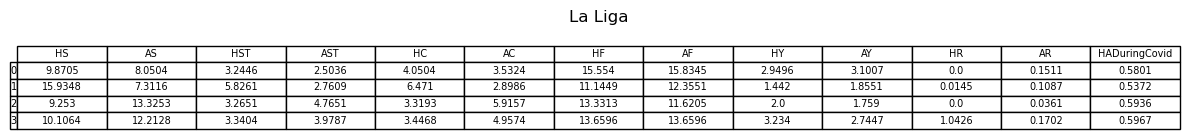

In [64]:
#Optimal value for k
optimal_k = 4
#Apply k-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
la_liga_during_covid['Cluster'] = kmeans.fit_predict(select_features_standardised)

#cluster summary 
cluster_summary = la_liga_during_covid.groupby('Cluster')[['HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR','HADuringCovid']].mean()

#Create a figure and axis for the table
fig = plt.figure(figsize = (15, .2))
ax = fig.add_subplot(111)

#Round the summaries to 4d.p.
cluster_summary = round(cluster_summary,4)

#Display the summary in a table
ax.table(cellText = cluster_summary.values, rowLabels = cluster_summary.index, 
         colLabels = cluster_summary.columns, cellLoc='center')

#Title
ax.set_title('La Liga')

#turn axes off
ax.axis('off')
#Show table
plt.show()